No data found for ticker AAPL in NYSE. Searching in NASDAQ...
No data found for ticker MSFT in NYSE. Searching in NASDAQ...
No data found for ticker GOOG in NYSE. Searching in NASDAQ...
No data found for ticker AMZN in NYSE. Searching in NASDAQ...
No data found for ticker NVDA in NYSE. Searching in NASDAQ...
No data found for ticker META in NYSE. Searching in NASDAQ...
No data found for ticker NFLX in NYSE. Searching in NASDAQ...
No data found for ticker PEP in NYSE. Searching in NASDAQ...
Data successfully imported.
   Ticker Recommendations  Buys  Sells  Neutrals
0     MRK     STRONG_SELL     1     17         8
1    MSFT     STRONG_SELL     0     16        10
2      PG     STRONG_SELL     1     17         8
3     LMT     STRONG_SELL     1     16         9
4     XOM            SELL     1     15        10
5     COP            SELL     2     15         9
6     PEP            SELL     1     15        10
7     PFE            SELL     4     14         8
8     SHW            SELL     7     

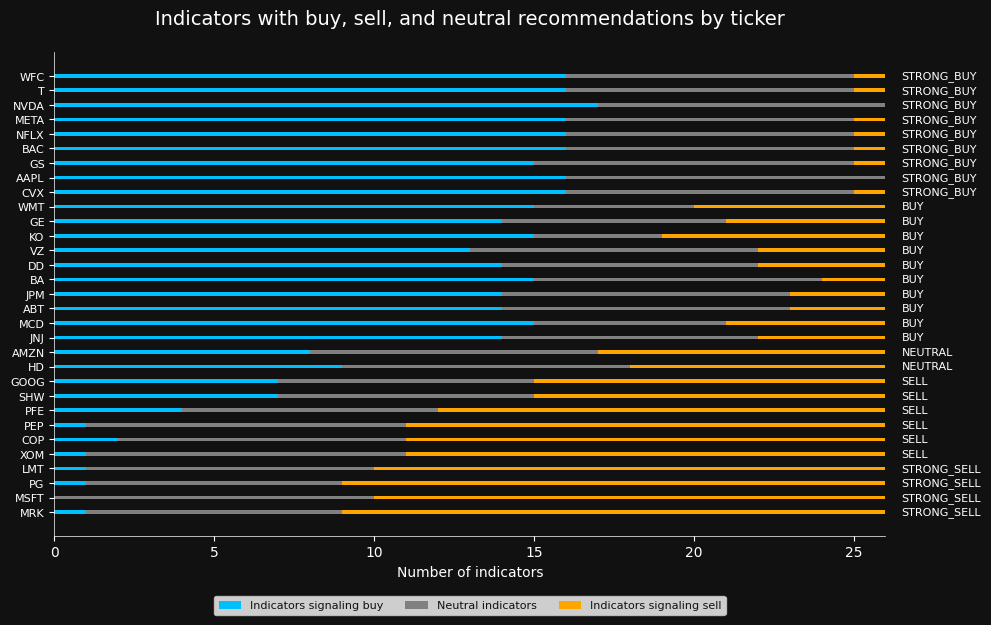

No data found for ticker AAPL in NYSE. Searching in NASDAQ...
No data found for ticker MSFT in NYSE. Searching in NASDAQ...
No data found for ticker GOOG in NYSE. Searching in NASDAQ...
No data found for ticker AMZN in NYSE. Searching in NASDAQ...
No data found for ticker NVDA in NYSE. Searching in NASDAQ...
No data found for ticker META in NYSE. Searching in NASDAQ...
No data found for ticker NFLX in NYSE. Searching in NASDAQ...
No data found for ticker PEP in NYSE. Searching in NASDAQ...
Data successfully imported.
Shares filtered: ['META', 'NFLX', 'T']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


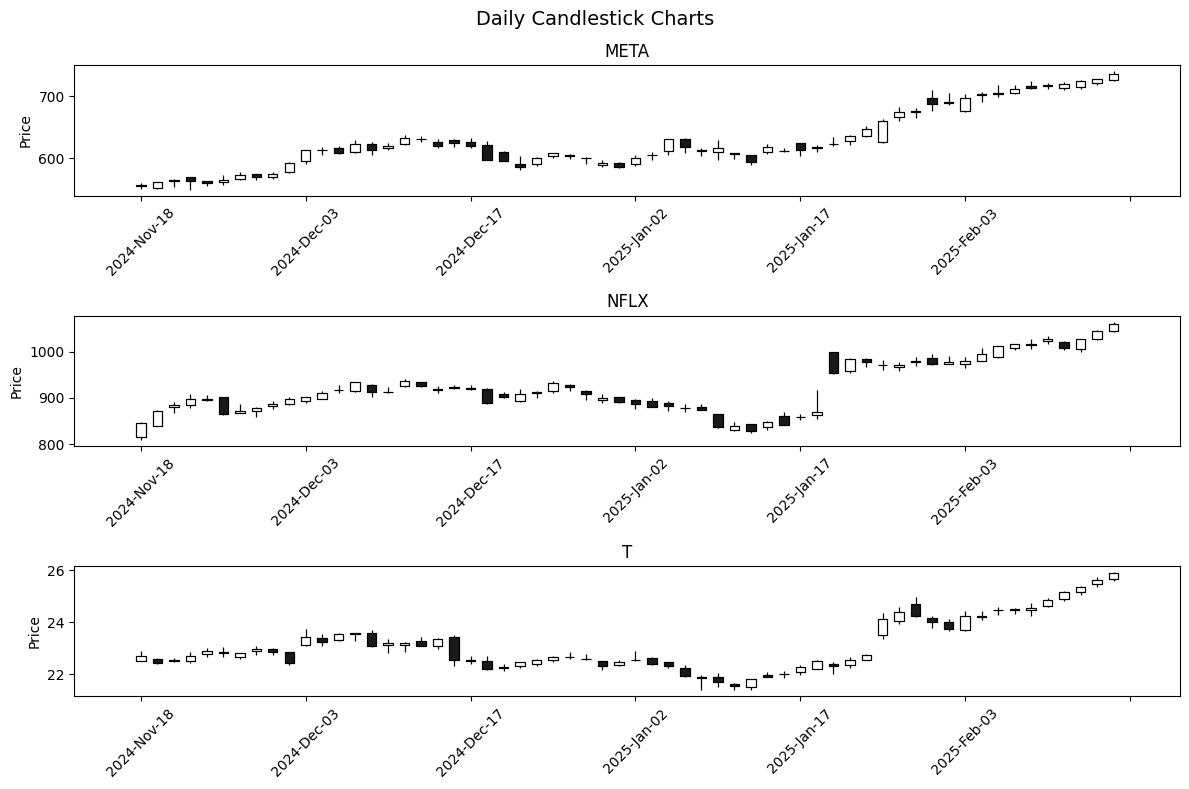

In [1]:
# import the libraries that we going to use for the analysis
import pandas as pd
import numpy as np
from tradingview_ta import TA_Handler, Interval, Exchange
import yfinance as yf
import mplfinance as mpf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

tickers = [
    "AAPL", "MSFT", "GOOG", "AMZN", "NVDA", "META", "HD", "MCD", "NFLX", "JNJ", "PFE", "MRK", "ABT", "JPM", "BAC", "WFC", "GS", "T", "VZ", "PG", "KO", "PEP", "WMT", "XOM", "CVX", "COP", "GE", "BA", "LMT", "DD", "SHW"
]

tickers_data = []

# Iterate through each ticker
for ticker in tickers:
    try:
        # Retrieve data for the ticker from NYSE
        data = TA_Handler(
            symbol=ticker,
            screener="america",
            exchange="NYSE",
            interval="1d"
        )
        data = data.get_analysis().summary
        tickers_data.append(data)

    except Exception as e:
        # If no data is found for the ticker in NYSE, search in NASDAQ
        print(f"No data found for ticker {ticker} in NYSE. Searching in NASDAQ...")
        data = TA_Handler(
            symbol=ticker,
            screener="america",
            exchange="NASDAQ",
            interval="1d"
        )
        data = data.get_analysis().summary
        tickers_data.append(data)

print("Data successfully imported.")

recommendations = []
buys = []
sells = []
neutrals = []

# Iterate through each data in tickers_data
for data in tickers_data:
    recommendation = data.get('RECOMMENDATION')
    buy = data.get('BUY')
    sell = data.get('SELL')
    neutral = data.get('NEUTRAL')

    recommendations.append(recommendation)
    buys.append(buy)
    sells.append(sell)
    neutrals.append(neutral)

data = {
    'Ticker': tickers,
    'Recommendations': recommendations,
    'Buys': buys,
    'Sells': sells,
    'Neutrals': neutrals
}

df = pd.DataFrame(data)


# Define the order of categories
order_categories = {
    'STRONG_BUY': 5,
    'BUY': 4,
    'NEUTRAL': 3,
    'SELL': 2,
    'STRONG_SELL': 1
}

# Assign a numerical value to each category in a new column "Order"
df['Order'] = df['Recommendations'].map(order_categories)
df = df.sort_values('Order', ascending=True).reset_index(drop=True)

# Drop the "Order" column if not needed in the final output
df = df.drop('Order', axis=1)

# Display the sorted dataframe
print(df)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#111111')
ax.set_facecolor('#111111')

# Add the horizontal bars for buys, neutrals, and sells
ax.barh(df.index, df["Buys"], height=0.25, color='#00BFFF', label='Indicators signaling buy')
ax.barh(df.index, df["Neutrals"], height=0.25, color='#808080', label='Neutral indicators', left=df["Buys"])
ax.barh(df.index, df["Sells"], height=0.25, color='#FFA500', label='Indicators signaling sell', left=df["Buys"] + df["Neutrals"])

# Set the axes labels
ax.set_yticks(df.index)
ax.set_yticklabels(df["Ticker"], fontsize=8, color='white')
ax.set_xlabel('Number of indicators', fontsize=10, color='white')

# Add title with larger font size and additional spacing
ax.set_title('Indicators with buy, sell, and neutral recommendations by ticker', fontsize=14, color='white', pad=20)

# Add the annotations
for i, recommendation in enumerate(df["Recommendations"]):
    ax.annotate(recommendation, xy=(25, i), xytext=(26.5, i),
                color='white', fontsize=8, va='center', ha='left')

# Remove the horizontal grid lines
ax.yaxis.grid(False)

# Configure the tick and axis styles
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust the spacing
plt.tight_layout()

# Set the text color of the legend to white
legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.175), ncol=3, fontsize=8)
for text in legend.get_texts():
    text.set_color('#111111')

# Display the plot
plt.show()

df_adrs_indicators = pd.DataFrame()

for ticker in tickers:
    try:
        data = TA_Handler(
            symbol=ticker,
            screener="america",
            exchange="NYSE",
            interval="1d"
        )
        data = data.get_analysis().indicators

    except Exception as e:
        print(f"No data found for ticker {ticker} in NYSE. Searching in NASDAQ...")
        data = TA_Handler(
            symbol=ticker,
            screener="america",
            exchange="NASDAQ",
            interval="1d"
        )
        data = data.get_analysis().indicators

    df_temp = pd.DataFrame(data, index=[ticker])
    df_adrs_indicators = pd.concat([df_adrs_indicators, df_temp])

df_adrs_indicators.columns = df_adrs_indicators.columns.astype(str)
print("Data successfully imported.")


# Filter stocks with EMA crossing SMA
df_filtered = df_adrs_indicators[df_adrs_indicators['EMA10'] > df_adrs_indicators['EMA20']]

# Filter stocks with RSI above 70 (overbought)
df_filtered = df_filtered[df_filtered['RSI'] > 75]

# Filter stocks with positive MACD (signal line crossover)
df_filtered = df_filtered[df_filtered['MACD.macd'] > df_filtered['MACD.signal']]

# Filter stocks with ADX above a certain threshold (indicating a strong trend)
df_filtered = df_filtered[df_filtered['ADX'] > 30]

# Print the stocks that meet the criteria
filtered_shares = df_filtered.index.to_list()

print('Shares filtered:', filtered_shares)


# Get the current date
end_date = datetime.now().strftime("%Y-%m-%d")

# Calculate the start date (3 months ago from today)
start_date = (datetime.now() - timedelta(days=3 * 30)).strftime("%Y-%m-%d")

# Calculate the number of rows and columns based on the desired layout
num_rows = len(filtered_shares)
num_cols = 1

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
fig.suptitle("Daily Candlestick Charts", fontsize=14)

# Iterate over each stock and add a subplot for each one
for i, symbol in enumerate(filtered_shares):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Get historical data from Yahoo Finance
    data = yf.download(symbol, start=start_date, end=end_date)

    # Plot the candlestick chart in the subplot
    data.columns = data.columns.droplevel(1)
    mpf.plot(data, type='candle', ax=axes[row], volume=False, show_nontrading=False)

    # Set the title of the subplot
    axes[row].set_title(symbol)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()